In [3]:
import gdxpds
import pandas as pd
co2_c_factor = 44/12

In [1]:
#gdx_file = 'C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output\MsgOutput_MESSAGEix-Materials_2.0deg_petro_thesis_2_macro.gdx'
#gdx_file = 'C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output\MsgOutput_MESSAGEix-Materials_2.0deg_petro_thesis_2_macro_w_ENGAGE_fixes_test_loil_exp_fix.gdx'
#gdx_file = 'C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output\MsgOutput_ENGAGE_SSP2_v4.1.8.3_T4.5_r3.1_baseline_magpie.gdx'
#gdx_file = 'C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output\MsgOutput_MESSAGEix-Materials_NoPolicy_petro_thesis_2_w_ENGAGE_fixes_test_build_2_macro.gdx'
#gdx_file = 'C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output/thesis final/MsgOutput_MESSAGEix-Materials_NoPolicy_petro_thesis_2_final_macro.gdx'
gdx_file = 'C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output/MsgOutput_MESSAGEix-GLOBIOM_1.1-R12-MAGPIE-MP00BD1BI00_baseline.gdx'
#gdx_file = 'C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output/MsgOutput_MESSAGEix-GLOBIOM_1.1-R12-MAGPIE-MP00BD1BI00_NPi2020-con-prim-dir-ncr_master.gdx'
#dataframes = gdxpds.to_dataframes(gdx_file)

In [3]:
mps = ["00", "30", "50", "76"]
bis = ["00", "70", "74", "78"]

In [28]:
import os

for mp in mps:
        for bi in bis:
            if bi == "00":
                bd = 1
            else:
                bd = 0
            model = f"MP{mp}BD{bd}BI{bi}"
            gdx_name = f"C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output/MsgOutput_MESSAGEix-GLOBIOM_1.1-R12-MAGPIE-MP{mp}BD{bd}BI{bi}_NPi2020-con-prim-dir-ncr.gdx"
            gdx_name = f"C:/Users\maczek\PycharmProjects\message_ix\message_ix\model\output/MsgOutput_MESSAGEix-GLOBIOM_1.1-R12-MAGPIE-MP{mp}BD{bd}BI{bi}_EN_NPi2020_650.gdx"
            #print(os.path.exists(gdx_name))
            if not os.path.exists(gdx_name):
                continue
            #print("test")
            df_act = gdxpds.to_dataframe(gdx_name, "ACT")["ACT"]
            #print(df_act.columns)
            print(model, df_act[(df_act["Level"]!=0) & (df_act["tec"]=="bio_backstop")]["Level"].values)
            #break
        #break

MP00BD1BI00 []
MP00BD0BI70 [0.03030621]
MP00BD0BI74 []
MP00BD0BI78 []
MP30BD1BI00 [0.08847191]
MP30BD0BI70 []
MP30BD0BI74 [0.02933949]
MP50BD1BI00 []
MP50BD0BI70 [0.0890051]
MP50BD0BI74 [0.01935185]
MP50BD0BI78 []
MP76BD1BI00 [0.12013137]
MP76BD0BI70 [0.0857669]
MP76BD0BI74 [0.02513131]
MP76BD0BI78 [0.04660288]


In [16]:
#df_all = gdxpds.to_dataframes(gdx_file)
df_all = gdxpds.to_dataframe(gdx_file, "land_output")

In [4]:
df_gro = gdxpds.to_dataframe(gdx_file, "growth_activity_lo")["growth_activity_lo"]
df_soft = gdxpds.to_dataframe(gdx_file, "soft_activity_lo")["soft_activity_lo"]

In [13]:
df_var = gdxpds.to_dataframe(gdx_file, "ACTIVITY_CONSTRAINT_LO")["ACTIVITY_CONSTRAINT_LO"]

In [20]:
df_var.columns = ["node", "tec", "year_all", "time", "Level", "Marginal", "Lower", "Upper", "Scale"]

In [21]:
df_var

,node,tec,year_all,time,Level,Marginal,Lower,Upper,Scale
0,R12_AFR,LNG_exp,2020,year,64.134989,0.0,29.753100,3.000000e+300,1.0
1,R12_AFR,LNG_exp,2025,year,32.884912,0.0,-9.048762,3.000000e+300,1.0
2,R12_AFR,LNG_exp,2030,year,31.082772,0.0,-9.048762,3.000000e+300,1.0
3,R12_AFR,LNG_exp,2035,year,12.542668,0.0,-9.048762,3.000000e+300,1.0
4,R12_AFR,LNG_exp,2040,year,32.041154,0.0,-9.048762,3.000000e+300,1.0
...,...,...,...,...,...,...,...,...,...
13732,R12_CHN,biomass_exp,2070,year,83.981427,0.0,-16.050522,3.000000e+300,1.0
13733,R12_CHN,biomass_exp,2080,year,81.488368,0.0,-16.050522,3.000000e+300,1.0
13734,R12_CHN,biomass_exp,2090,year,80.277312,0.0,-16.050522,3.000000e+300,1.0
13735,R12_CHN,biomass_exp,2100,year,102.884565,0.0,-16.050522,3.000000e+300,1.0


In [34]:
[i for i in list(df_gro.tec.unique()) if i not in list(df_soft.tec.unique())]
#[i for i in list(df_soft.tec.unique()) if i not in list(df_gro.tec.unique())]
[i for i in list(df_soft.tec.unique()) if i not in list(df_var.tec.unique())]
#[i for i in list(df_var.tec.unique()) if i not in list(df_soft.tec.unique())]
#[i for i in list(df_var.tec.unique()) if ((i not in list(df_gro.tec.unique())) & (i not in list(df_soft.tec.unique())))]
[i for i in list(df_var.tec.unique()) if (i not in list(df_soft.tec.unique()))]

['wind_ppf',
 'biomass_imp',
 'biomass_exp',
 'LH2_bunker',
 'LNG_bunker',
 'eth_bunker',
 'foil_bunker',
 'loil_bunker',
 'meth_bunker']

In [17]:
df_all = df_all["land_output"]

In [18]:
df_all[(df_all["commodity"]=="bioenergy") & ( df_all["node"]=="R12_CHN") & (df_all["year_all"]=="2020")]

,node,land_scenario,year_all,commodity,level,time,Value
2201157,R12_CHN,BIO05GHG000,2020,bioenergy,land_use,year,238.5000
2201158,R12_CHN,BIO05GHG000,2020,bioenergy,land_use_reporting,year,238.5029
2203425,R12_CHN,BIO05GHG010,2020,bioenergy,land_use,year,238.5000
2203426,R12_CHN,BIO05GHG010,2020,bioenergy,land_use_reporting,year,238.5029
2205735,R12_CHN,BIO05GHG020,2020,bioenergy,land_use,year,238.5000
...,...,...,...,...,...,...,...
2388263,R12_CHN,BIO45GHG4000,2020,bioenergy,land_use_reporting,year,238.5029
2390583,R12_CHN,BIO45GHG600,2020,bioenergy,land_use,year,238.5000
2390584,R12_CHN,BIO45GHG600,2020,bioenergy,land_use_reporting,year,238.5029
2392903,R12_CHN,BIO45GHG990,2020,bioenergy,land_use,year,238.5000


In [33]:
v[v.node.isin(["R12_CHN"])]

C:\Users\maczek\AppData\Local\Temp\ipykernel_24400\878313158.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  v[v.node.isin(["R12_CHN"])]


ValueError: cannot reindex on an axis with duplicate labels

In [57]:
bio_dict = {}
for k,v in df_all.items():
    if "tec" in v.columns:
        if len(v[v.tec.str.contains("bio")]["tec"].unique()):
        #print(v[v.tec.str.contains("bio")]["tec"].unique())
            if "node" in v.columns:
                v_temp = v.loc[:,~v.columns.duplicated()].copy()
                bio_dict[k] = v_temp[(v_temp.tec.str.contains("bio")) & (v_temp.node =="R12_CHN")]

In [69]:
lo_dict = {k:v for k,v in bio_dict.items() if (("lo" in k))}
{k:i.tec.unique() for k,i in lo_dict.items()}

{'is_bound_new_capacity_lo': array(['bio_ppl', 'eth_bio'], dtype=object),
 'is_dynamic_activity_lo': array(['bio_ppl', 'biomass_i', 'biomass_rc', 'biomass_imp', 'biomass_exp'],
       dtype=object),
 'bound_new_capacity_lo': array(['bio_ppl', 'eth_bio'], dtype=object),
 'bound_activity_lo': array(['bio_hpl', 'bio_ppl', 'biomass_i', 'eth_bio'], dtype=object),
 'initial_activity_lo': array(['bio_ppl', 'biomass_i', 'biomass_rc', 'biomass_imp', 'biomass_exp'],
       dtype=object),
 'growth_activity_lo': array(['bio_ppl', 'biomass_i', 'biomass_rc', 'biomass_imp', 'biomass_exp'],
       dtype=object),
 'soft_activity_lo': array(['bio_extr_mpen', 'bio_hpl', 'bio_istig', 'bio_istig_ccs',
        'bio_ppl', 'bio_ppl_co2scr', 'biomass_i', 'biomass_rc',
        'biomass_t_d', 'eth_bio', 'eth_bio_ccs', 'gas_bio', 'h2_bio',
        'h2_bio_ccs', 'landfill_mechbio', 'liq_bio', 'liq_bio_ccs'],
       dtype=object),
 'abs_cost_activity_soft_lo': array(['bio_extr_mpen'], dtype=object),
 'level_cost_ac

In [42]:
for k,v in lo_dict.items():
    print(k,v)

is_bound_new_capacity_lo ['bio_ppl' 'eth_bio' 'bio_istig']
is_dynamic_activity_lo ['biomass_i' 'biomass_rc' 'biomass_imp' 'biomass_exp' 'bio_ppl']
bound_new_capacity_lo ['bio_ppl' 'eth_bio']
bound_activity_lo ['bio_ppl' 'biomass_i' 'eth_bio' 'bio_hpl' 'biomass_rc' 'biomass_t_d'
 'biomass_nc' 'bio_istig' 'gas_bio']
initial_activity_lo ['biomass_i' 'biomass_rc' 'biomass_imp' 'biomass_exp' 'bio_ppl']
growth_activity_lo ['biomass_i' 'biomass_rc' 'biomass_imp' 'biomass_exp' 'bio_ppl']
soft_activity_lo ['bio_extr_mpen' 'bio_hpl' 'bio_istig' 'bio_istig_ccs' 'bio_ppl'
 'bio_ppl_co2scr' 'biomass_i' 'biomass_rc' 'biomass_t_d' 'eth_bio'
 'eth_bio_ccs' 'gas_bio' 'h2_bio' 'h2_bio_ccs' 'landfill_mechbio'
 'liq_bio' 'liq_bio_ccs']
abs_cost_activity_soft_lo ['bio_extr_mpen']
level_cost_activity_soft_lo ['bio_hpl' 'bio_istig' 'bio_istig_ccs' 'bio_ppl' 'bio_ppl_co2scr'
 'biomass_i' 'biomass_rc' 'biomass_t_d' 'eth_bio' 'eth_bio_ccs' 'gas_bio'
 'h2_bio' 'h2_bio_ccs' 'landfill_mechbio' 'liq_bio' 'liq_bio_c

In [12]:
import ixmp
import message_ix

mp = ixmp.Platform("ixmp_dev")
df = mp.scenario_list()

<IPython.core.display.Javascript object>

In [16]:
df[df["model"].str.contains("MAGPIE")]["model"].unique()
df[df["model"]=="ENGAGE-MAGPIE_SSP2"]

,model,scenario,scheme,is_default,is_locked,cre_user,cre_date,upd_user,upd_date,lock_user,lock_date,annotation,version
1249,ENGAGE-MAGPIE_SSP2,1000f,MESSAGE,1,0,steinhauser,2023-05-05 13:33:33.000000,steinhauser,2023-05-12 17:07:36.000000,None,None,clone Scenario from 'ENGAGE-MAGPIE_SSP2|baseli...,1
1250,ENGAGE-MAGPIE_SSP2,EN_NPi2020_1000,MESSAGE,1,0,steinhauser,2023-07-24 17:05:34.000000,steinhauser,2023-07-24 17:12:10.000000,None,None,clone Scenario from 'ENGAGE-MAGPIE_SSP2|EN_NPi...,1
1251,ENGAGE-MAGPIE_SSP2,EN_NPi2020_1000_step1,MESSAGE,1,0,steinhauser,2023-07-24 16:20:13.000000,steinhauser,2023-07-24 16:32:50.000000,None,None,clone Scenario from 'ENGAGE-MAGPIE_SSP2|NPi202...,1
1252,ENGAGE-MAGPIE_SSP2,EN_NPi2020_1000_step2,MESSAGE,1,0,steinhauser,2023-07-24 16:47:04.000000,steinhauser,2023-07-24 16:50:29.000000,None,None,clone Scenario from 'ENGAGE-MAGPIE_SSP2|EN_NPi...,1
1253,ENGAGE-MAGPIE_SSP2,EN_NPi2020_1000f,MESSAGE,1,0,steinhauser,2023-07-24 19:49:23.000000,steinhauser,2023-07-24 20:05:26.000000,None,None,clone Scenario from 'ENGAGE-MAGPIE_SSP2|NPi202...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,ENGAGE-MAGPIE_SSP2,npi_low_dem_scen2,MESSAGE,1,0,steinhauser,2023-07-12 11:09:57.000000,steinhauser,2023-07-12 11:19:35.000000,None,None,clone Scenario from 'ENGAGE-MAGPIE_SSP2|NPi202...,1
1320,ENGAGE-MAGPIE_SSP2,orgCode_1000f,MESSAGE,1,1,steinhauser,2023-05-13 19:37:52.000000,None,None,steinhauser,2023-05-13 20:47:53.000000,clone Scenario from 'ENGAGE-MAGPIE_SSP2|orgCod...,1
1321,ENGAGE-MAGPIE_SSP2,orgCode_1000f_slackLandUp,MESSAGE,1,0,steinhauser,2023-05-16 09:18:19.000000,None,None,None,None,clone Scenario from 'ENGAGE-MAGPIE_SSP2|orgCod...,1
1322,ENGAGE-MAGPIE_SSP2,orgCode_baseline,MESSAGE,1,0,steinhauser,2023-05-15 13:04:26.000000,steinhauser,2023-05-15 13:43:43.000000,None,None,clone Scenario from 'JST_test|ENGAGE_baseline_...,2


In [17]:
scen = message_ix.Scenario(mp, "ENGAGE-MAGPIE_SSP2", "baseline")

In [19]:
df_lu_old = scen.par("land_use")

In [22]:
df_lu_old.groupby(["node", "land_scenario", "year"]).sum()

value
node    land_scenario year        
R11_AFR BIO00GHG000   1990  0.7953
                      1995  0.7953
                      2000  0.7951
                      2005  0.7975
                      2010  0.8051
...                            ...
R11_WEU BIO45GHG600   2070  0.7248
                      2080  0.7245
                      2090  0.7221
                      2100  0.7225
                      2110  0.7225

[18480 rows x 1 columns]

In [10]:
df_lu_act = gdxpds.to_dataframe(gdx_file, "land_use")["land_use"]
df_lu_act.columns

Index(['node', 'land_scenario', 'year_all', 'land_type', 'Value'], dtype='object')

In [11]:
df_lu_act.groupby(["node", "land_scenario", "year_all"]).sum()

Value
node    land_scenario year_all        
R12_AFR BIO00GHG000   1990      0.7945
                      1995      0.7945
                      2000      0.7943
                      2005      0.7941
                      2010      0.8016
...                                ...
R12_WEU BIO45GHG990   2070      0.7251
                      2080      0.7249
                      2090      0.7231
                      2100      0.7216
                      2110      0.7216

[20160 rows x 1 columns]

In [57]:
df_lu_act = gdxpds.to_dataframe(gdx_file, "LAND")
df_lu_out = gdxpds.to_dataframe(gdx_file, "land_output")

In [58]:
df_lu_out = df_lu_out["land_output"]
df_lu_act = df_lu_act["LAND"]

In [59]:
df_lu_act = df_lu_act[df_lu_act.columns[:-4]]
df_lu_act = df_lu_act[df_lu_act["Level"] != 0]
df_lu_out = df_lu_out.set_index(["node", "land_scenario", "year_all"])
df_lu_act = df_lu_act.set_index(["node", "land_scenario", "year_all"])
df_lu = df_lu_act.join(df_lu_out)
df_lu["value"] = df_lu["Level"] * df_lu["Value"]

In [68]:
df_matrix = pd.read_csv("C:/Users\maczek\PycharmProjects\message_data\data\globiom/magpie_input_MP00BD1BI00.csv")

In [70]:
data_swapped = {
    'SubSaharanAfrica': 'R12_AFR',
    'PlannedAsiaChina': 'R12_RCPA',
    'ChinaReg': 'R12_CHN',
    'CentralEastEurope': 'R12_EEU',
    'FormerSovietUnion': 'R12_FSU',
    'LatinAmericaCarib': 'R12_LAM',
    'MidEastNorthAfrica': 'R12_MEA',
    'NorthAmerica': 'R12_NAM',
    'PacificOECD': 'R12_PAO',
    'OtherPacificAsia': 'R12_PAS',
    'SouthAsia': 'R12_SAS',
    'WesternEurope': 'R12_WEU'
}


In [77]:
df_matrix = df_matrix.drop(["SSPscen", "SDGscen"], axis=1)

In [80]:
df_matrix["land_scenario"] = df_matrix["BIOscen"] + df_matrix["GHGscen"]

In [82]:
df_matrix = df_matrix.drop(["BIOscen", "GHGscen"], axis=1)

In [87]:
df_matrix = df_matrix.melt(id_vars=["Region", "Variable", "Unit", "land_scenario"], var_name="year_all")

In [88]:
df_matrix = df_matrix.replace({'Region': data_swapped})

In [93]:
df_matrix = df_matrix.rename({"Region":"node", "Variable":"commodity"}, axis=1)
df_matrix = df_matrix.drop("Unit", axis=1)

In [97]:
df_matrix = df_matrix.set_index(["node", "land_scenario", "year_all"])

In [112]:
df_lu = df_lu_act.join(df_matrix)#.swaplevel(0,2).loc["2035"]#.groupby(["node", "year_all"]).sum()

In [114]:
df_lu["val_eff"] = df_lu["Level"] * df_lu["value"]

In [137]:
indic = "Biodiversity|BII"

In [ ]:
legend1 = []
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,10))
for i, reg in df_lu.index.get_level_values(0).unique()[:6]:
    df_temp = df_lu.loc[reg]
    df_temp[(df_temp["commodity"]==indic)]["val_eff"].groupby(["year_all"]).sum().plot(x="year_all")
    legend.append(reg)
ax.legend(legend, loc=2, ncol=3)

NameError: name 'df_lu' is not defined

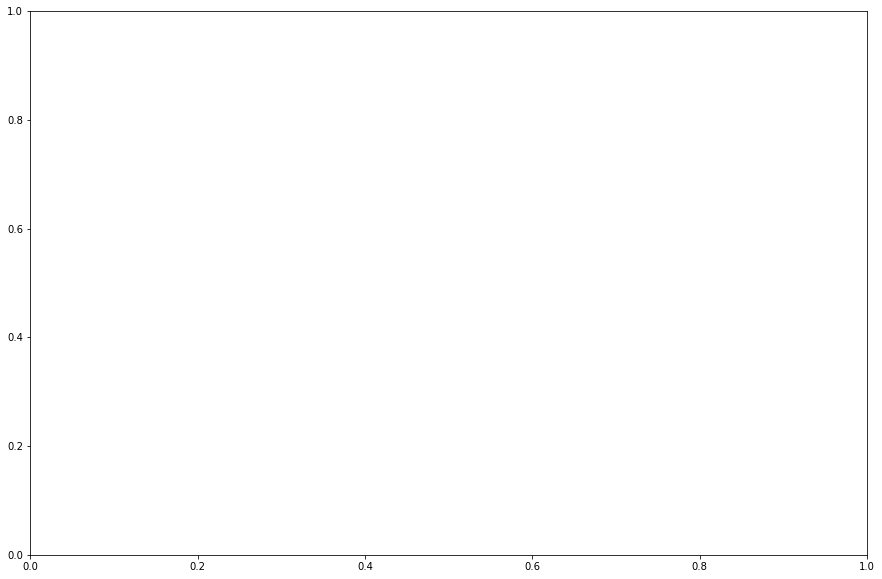

In [1]:
legend1 = []
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,10))
for i, reg in df_lu.index.get_level_values(0).unique()[6:]:
    df_temp = df_lu.loc[reg]
    df_temp[(df_temp["commodity"]==indic)]["val_eff"].groupby(["year_all"]).sum().plot(x="year_all")
    legend.append(reg)
ax.legend(legend, loc=2, ncol=3)

In [121]:
df_lu[(df_lu["commodity"]=="Biodiversity|BII")]["val_eff"]

node     land_scenario  year_all
R12_AFR  BIO00GHG000    2035        0.167425
                        2040        0.295972
                        2045        0.394696
                        2050        0.471256
                        2055        0.528590
                                      ...   
R12_WEU  BIO00GHG990    2070        0.036868
                        2080        0.022109
                        2090        0.013248
                        2100        0.007938
         BIO05GHG050    2020        0.759600
Name: val_eff, Length: 305, dtype: float64

In [90]:
df_matrix[df_matrix["commodity"]=="Biodiversity|BII"]

Level                        commodity  \
node    land_scenario year_all                                              
R12_AFR BIO00GHG000   2035      0.226219                       Population   
                      2035      0.226219                              TCE   
                      2035      0.226219                           LU_CO2   
                      2035      0.226219              BCA_LandUseChangeEM   
                      2035      0.226219                  BCA_SavanBurnEM   
...                                  ...                              ...   
R12_WEU BIO05GHG050   2020      1.000000                         Costs|TC   
                      2020      1.000000  Emissions|CO2|AFOLU|Agriculture   
                      2020      1.000000  Emissions|CO2|AFOLU|Soil Carbon   
                      2020      1.000000              Emissions|GHG|AFOLU   
                      2020      1.000000  Landuse intensity indicator Tau   

                                             level  time      Value  \
node    land_scenario year_all                                        
R12_AFR BIO00GHG000   2035      land_use_reporting  year  1605.5862   
                      2035      land_use_reporting  year   863.1115   
                      2035      land_use_reporting  year   469.4045   
                      2035      land_use_reporting  year    58.1282   
                      2035      land_use_reporting  year   715.0514   
...                                            ...   ...        ...   
R12_WEU BIO05GHG050   2020      land_use_reporting  year  5418.4543   
                      2020      land_use_reporting  year    -5.1668   
                      2020      land_use_reporting  year   -40.2557   
                      2020      land_use_reporting  year   480.2134   
                      2020      land_use_reporting  year     2.0366   

                                      value  
node    land_scenario year_all               
R12_AFR BIO00GHG000   2035       363.214205  
                      2035       195.252274  
                      2035       106.188246  
                      2035        13.149707  
                      2035       161.758257  
...                                     ...  
R12_WEU BIO05GHG050   2020      5418.454300  
                      2020        -5.166800  
                      2020       -40.255700  
                      2020       480.213400  
                      2020         2.036600  

[39628 rows x 6 columns]

In [66]:
#df_afr = df_lu.loc["R12_AFR"]
df_afr[(df_afr["commodity"]=="Biodiversity|BII")]

,,Level,commodity,level,time,Value,value
land_scenario,year_all,,,,,,


In [50]:
df_lu[(df_lu["commodity"]=="bioenergy") & (df_lu["level"]=="land_use")]["value"].groupby(["node", "year_all"]).sum()

node     year_all
R12_AFR  2020        494.475077
         2025        475.040000
         2030        458.300000
         2035        441.650000
         2040        425.000000
                        ...    
R12_WEU  2070         82.237854
         2080         75.834860
         2090         70.045717
         2100         64.567990
         2110         59.274784
Name: value, Length: 168, dtype: float64

In [3]:
df = gdxpds.to_dataframe(gdx_file, "inv_cost")

In [ ]:
df=df["inv_cost"]

KeyError: 'inv_cost'

In [14]:
df

,node,tec,year_all,Value
0,R12_AFR,LNG_exp,1995,235.0
1,R12_AFR,LNG_exp,2000,235.0
2,R12_AFR,LNG_exp,2005,235.0
3,R12_AFR,LNG_exp,2010,235.0
4,R12_AFR,LNG_exp,2015,235.0
...,...,...,...,...
66344,R12_CHN,meth_exp,2070,235.0
66345,R12_CHN,meth_exp,2080,235.0
66346,R12_CHN,meth_exp,2090,235.0
66347,R12_CHN,meth_exp,2100,235.0


In [7]:
df.year_all = df.year_all.astype("int")

In [17]:
df_nam = df[df["node"]=="R12_NAM"].set_index(["tec", "year_all"])

In [26]:
df_merge = df.set_index(["tec", "year_all"]).merge(df_nam, left_index=True, right_index=True)
df_merge["ratio"]=df_merge["Value_x"] / df_merge["Value_y"]

In [33]:
df_merge = df_merge.reset_index()

(2018.0, 2055.0)

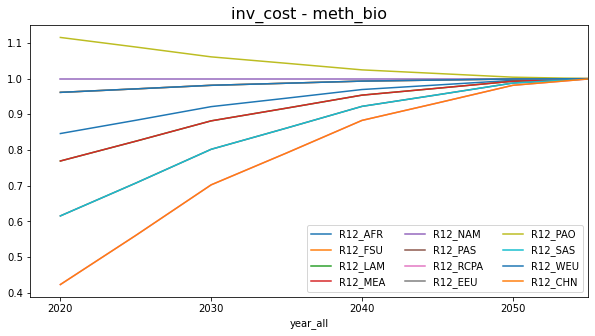

In [38]:
tec_name = "meth_bio"

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
legend = []
for reg in df_merge.node_x.unique():
    df_merge[(df_merge["tec"]==tec_name) & (df_merge["node_x"]==reg) & (df_merge["year_all"] > 2015)].plot(x="year_all", y="ratio",ax=ax)
    legend.append(reg)
ax.legend(legend, ncol=3)
ax.set_title(f"inv_cost - {tec_name}", fontsize=16)
ax.set_xticks([i for i in range(2020, 2110, 10)])
ax.set_xlim(2018, 2055)

(2018.0, 2060.0)

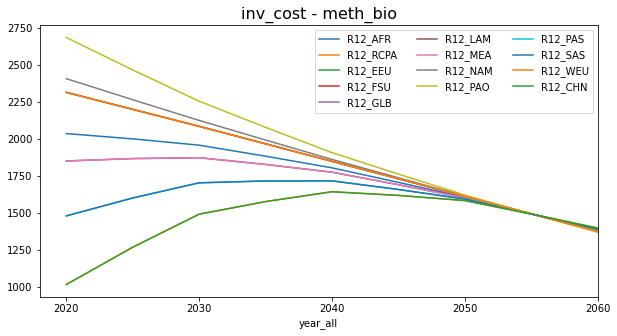

In [12]:
tec_name = "meth_bio"

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
legend = []
for reg in df.node.unique():
    df[(df["tec"]==tec_name) & (df["node"]==reg) & (df["year_all"] > 2015)].plot(x="year_all", y="Value",ax=ax)
    legend.append(reg)
ax.legend(legend, ncol=3)
ax.set_title(f"inv_cost - {tec_name}", fontsize=16)
ax.set_xticks([i for i in range(2020, 2110, 10)])
ax.set_xlim(2018, 2060)

In [4]:
hist_act = dataframes["historical_activity"]

In [15]:
#h
hist_act = hist_act[hist_act["year_all"]=="2015"]
hist_act_rcpa = hist_act[hist_act["node"]=="R12_RCPA"]
hist_act_chn = hist_act[hist_act["node"]=="R12_CHN"]
hist_act_merge = hist_act_rcpa.merge(hist_act_chn, left_on="tec", right_on="tec")
hist_act_merge["ratio"] = hist_act_merge["Value_x"] / hist_act_merge["Value_y"]

In [21]:
hist_act_merge[hist_act_merge["ratio"]<0.111]

,node_x,tec,year_all_x,mode_x,time_x,Value_x,node_y,year_all_y,mode_y,time_y,Value_y,ratio
35,R12_RCPA,elec_trp,2015,M1,year,5.000000,R12_CHN,2015,M1,year,54.270254,0.092132
54,R12_RCPA,gas_extr_mpen,2015,M1,year,0.100000,R12_CHN,2015,M1,year,153.154140,0.000653
81,R12_RCPA,oil_exp,2015,M1,year,1.000000,R12_CHN,2015,M1,year,51.318611,0.019486
85,R12_RCPA,oil_extr_mpen,2015,M1,year,0.100000,R12_CHN,2015,M1,year,250.804477,0.000399
156,R12_RCPA,eaf_steel,2015,M2,year,0.893333,R12_CHN,2015,M1,year,72.360000,0.012346
165,R12_RCPA,catalytic_cracking_ref,2015,atm_gasoil,year,5.953922,R12_CHN,2015,vacuum_gasoil,year,112.350506,0.052994
173,R12_RCPA,import_petro,2015,M1,year,0.120969,R12_CHN,2015,M1,year,18.270686,0.006621
174,R12_RCPA,export_petro,2015,M1,year,0.004573,R12_CHN,2015,M1,year,0.221271,0.020667
175,R12_RCPA,gas_NH3,2015,M1,year,0.165746,R12_CHN,2015,M1,year,9.662983,0.017153
176,R12_RCPA,coal_NH3,2015,M1,year,0.834254,R12_CHN,2015,M1,year,48.637017,0.017153


In [38]:
hist_act = dataframes["DEMAND"]
hist_act

,node,commodity,level,year_all,time,Level,Marginal,Lower,Upper,Scale
0,R12_AFR,NH3,final_material,2020,year,2.500000,0.0,4.000000e+300,3.000000e+300,1.0
1,R12_AFR,NH3,final_material,2025,year,2.735064,0.0,4.000000e+300,3.000000e+300,1.0
2,R12_AFR,NH3,final_material,2030,year,2.906112,0.0,4.000000e+300,3.000000e+300,1.0
3,R12_AFR,NH3,final_material,2035,year,3.156448,0.0,4.000000e+300,3.000000e+300,1.0
4,R12_AFR,NH3,final_material,2040,year,3.342780,0.0,4.000000e+300,3.000000e+300,1.0
...,...,...,...,...,...,...,...,...,...,...
2060,R12_CHN,fcoh_resin,final_material,2060,year,0.282172,0.0,4.000000e+300,3.000000e+300,1.0
2061,R12_CHN,fcoh_resin,final_material,2070,year,0.215595,0.0,4.000000e+300,3.000000e+300,1.0
2062,R12_CHN,fcoh_resin,final_material,2080,year,0.094929,0.0,4.000000e+300,3.000000e+300,1.0
2063,R12_CHN,fcoh_resin,final_material,2090,year,0.030637,0.0,4.000000e+300,3.000000e+300,1.0


In [70]:
#h
hist_act = hist_act[hist_act["year_all"]=="2020"]
#hist_act = hist_act.set_index(["commodity", "level"])
hist_act_rcpa = hist_act[hist_act["node"]=="R12_RCPA"]
hist_act_chn = hist_act[hist_act["node"]=="R12_CHN"]

hist_act_merge = hist_act_rcpa.join(hist_act_chn["Level"], rsuffix="_x")
hist_act_merge["ratio"] = hist_act_merge["Level"] / hist_act_merge["Level_x"]

In [71]:
hist_act_merge

,,node,year_all,time,Level,Marginal,Lower,Upper,Scale,Level_x,ratio
commodity,level,,,,,,,,,,
NH3,final_material,R12_RCPA,2020,year,2.500000,0.0,4.000000e+300,3.000000e+300,1.0,18.000000,0.138889
methanol,final_material,R12_RCPA,2020,year,0.204400,0.0,4.000000e+300,3.000000e+300,1.0,24.732400,0.008264
i_spec,useful,R12_RCPA,2020,year,16.366848,0.0,4.000000e+300,3.000000e+300,1.0,147.301632,0.111111
i_therm,useful,R12_RCPA,2020,year,25.932783,0.0,4.000000e+300,3.000000e+300,1.0,233.395048,0.111111
non-comm,useful,R12_RCPA,2020,year,2.142900,0.0,4.000000e+300,3.000000e+300,1.0,19.286100,0.111111
rc_spec,useful,R12_RCPA,2020,year,9.493912,0.0,4.000000e+300,3.000000e+300,1.0,85.445212,0.111111
rc_therm,useful,R12_RCPA,2020,year,34.041000,0.0,4.000000e+300,3.000000e+300,1.0,306.369000,0.111111
transport,useful,R12_RCPA,2020,year,55.257000,0.0,4.000000e+300,3.000000e+300,1.0,497.313000,0.111111
steel,demand,R12_RCPA,2020,year,12.083479,0.0,4.000000e+300,3.000000e+300,1.0,980.023775,0.012330


In [ ]:
hist_act_merge[hist_act_merge["ratio"]<0.111]

In [18]:
hist_act_merge[["tec", "ratio"]].sort_values("ratio")

,tec,ratio
85,oil_extr_mpen,0.000399
54,gas_extr_mpen,0.000653
177,export_NFert,0.002051
183,meth_exp,0.002823
182,meth_exp,0.002823
...,...,...
166,catalytic_cracking_ref,0.232963
142,extract__freshwater_supply,0.250000
179,import_NH3,0.331096
155,eaf_steel,1.000000


In [3]:
act = dataframes["ACT"].drop(["time", "Marginal", "Lower", "Upper", "Scale"], axis=1)
act = act[act["Level"] != 0]
act = act.rename({"vintage":"year_vtg", "year_all":"year_act", "node":"node_loc"}, axis=1)
act = act.set_index(["node_loc", "year_act", "tec", "mode", "year_vtg"])

In [4]:
inp = dataframes["input"].drop("time", axis=1)
node_cols = inp["node"]
node_cols.columns = ["node_loc", "node_origin"]
inp["node_loc"] = node_cols["node_loc"]
inp["node_origin"] = node_cols["node_origin"]
inp = inp.rename({"vintage":"year_vtg", "year_all":"year_act"}, axis=1)
inp = inp.drop("node", axis=1)
inp = inp.set_index(["node_loc", "year_act", "tec", "mode", "year_vtg"])

In [5]:
act_in = act.join(inp)
act_in = act_in.dropna()
act_in["input"] = act_in["Level"] * act_in["Value"]

In [6]:
out = dataframes["output"].drop("time", axis=1)
node_cols = out["node"]
node_cols.columns = ["node_loc", "node_dest"]
out["node_loc"] = node_cols["node_loc"]
out["node_origin"] = node_cols["node_dest"]
out = out.rename({"vintage":"year_vtg", "year_all":"year_act"}, axis=1)
out = out.drop("node", axis=1)
out = out.set_index(["node_loc", "year_act", "year_vtg", "tec", "mode"])

In [7]:
act_out = act.join(out)
act_out = act_out.dropna()
act_out["output"] = act_out["Level"] * act_out["Value"]

In [8]:
rel = dataframes["relation_activity"]
node_cols = rel["node"]
node_cols.columns = ["node_loc", "node_dest"]
rel["node_loc"] = node_cols["node_loc"]
rel["node_origin"] = node_cols["node_dest"]

year_cols = rel["year_all"]
year_cols.columns = ["year_act", "year_rel"]
rel["year_act"] = year_cols["year_act"]
rel["year_rel"] = year_cols["year_rel"]

rel = rel.drop("node", axis=1)
rel = rel.drop("year_all", axis=1)
rel = rel.set_index(["node_loc", "year_act", "tec", "mode"])

In [9]:
rel_co2emi = rel[rel["relation"]=="CO2_Emission"]

In [10]:
emi_top_down = rel_co2emi.join(act).dropna()
emi_top_down["emi"] = emi_top_down["Value"] * emi_top_down["Level"] #<

In [11]:
emi_bott_up_names =  ["CO2_ind", "CO2_r_c", "CO2_trp", "CO2_trade", "CO2_shipping", "CO2_cc"]

In [12]:
emi_bott_up = rel[rel["relation"].isin(emi_bott_up_names).values]
emi_bott_up = emi_bott_up.join(act).dropna()
emi_bott_up["emi"] = emi_bott_up["Value"] * emi_bott_up["Level"]

In [38]:
act.index = act.index.swaplevel(0,1)
act.index = act.index.swaplevel(1,2)
#act2020 = act.loc["2020"]
act2020[act2020.index.get_level_values(0).str.startswith("oil_i")].groupby("tec").sum()

,Level
tec,
biomass_i,167.172537
coal_i,646.478318
elec_i,87.922704
foil_i,100.367546
gas_i,569.083035
heat_i,176.669585
hp_gas_i,5.982707
loil_i,96.592091
solar_i,96.415719


In [5]:
act.index = act.index.swaplevel(0, 2)
act

Level
tec      year_act node_loc mode      year_vtg           
CH4_TCE  2020     R12_AFR  M1        2020      10.356186
         2025     R12_AFR  M1        2025      11.408378
         2030     R12_AFR  M1        2030      12.528957
         2035     R12_AFR  M1        2035      13.711018
         2040     R12_AFR  M1        2040      14.759977
...                                                  ...
meth_imp 2035     R12_CHN  feedstock 2035      24.245616
         2040     R12_CHN  feedstock 2040      31.090559
         2045     R12_CHN  feedstock 2045      25.668182
         2050     R12_CHN  feedstock 2050      11.717664
         2055     R12_CHN  feedstock 2055       0.923019

[66620 rows x 1 columns]

                Level
year_act             
2020      3215.410027
2025      3639.927256
2030      4032.417858
2035      4384.430552
2040      4582.811404
2045      4625.292203
2050      4473.551896
2055      4183.626996
2060      3755.588088
2070      2300.091380
2080      1324.577029
2090       857.266707
2100       796.318673
2110      1468.300602
                Level
year_act             
2020        39.794360
2025        68.371773
2030       116.419351
2035       192.174476
2040       317.179604
2045       476.168020
2050       703.454829
2055      1018.044083
2060      1447.998813
2070      2065.563856
2080      2384.014642
2090      3410.512507
2100      4269.243252
2110      5530.804486


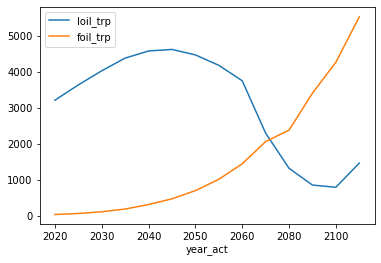

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
legend = []
for i in ["loil_trp", "foil_trp"]:
    print(act.loc[i].groupby(["year_act"]).sum())
    act.loc[i].groupby(["year_act"]).sum().reset_index().plot(ax=ax, x="year_act", y="Level")
    legend.append(i)
ax.legend(legend)

## identify missing relations

In [16]:
rel["count"] = 1
tecs = list(rel[rel.index.get_level_values(2).str.startswith("meth_")].index.get_level_values(2).unique())

meth_rel = rel.swaplevel(0,2).loc[tecs]
counts = meth_rel[~meth_rel.index.get_level_values(1).isin(["1990", "1995", "2000", "2005", "2010", "2015"])].groupby(["tec","year_act", "node_loc", "relation"]).sum()["count"]

In [17]:
fuel = meth_rel.swaplevel(0,3).loc["fuel"]
fuel["df"] = "fuel"

m1 = meth_rel.swaplevel(0,3).loc["M1"]
m1["df"] = "M1"

w_labels = pd.concat([fuel, m1]).reset_index()
wo_labels = pd.concat([fuel.drop("df", axis=1), m1.drop("df", axis=1)]).reset_index()

In [18]:
diff = wo_labels.drop_duplicates(keep=False).merge(w_labels["df"], left_index=True, right_index=True)
diff[diff["df"]=="fuel"]

,year_act,node_loc,tec,relation,Value,node_origin,year_rel,count,df
0,1990,R12_GLB,meth_trd,CO2_trade,0.005545,R12_GLB,1990,1,fuel
1,1995,R12_GLB,meth_trd,CO2_trade,0.005545,R12_GLB,1995,1,fuel
2,2000,R12_GLB,meth_trd,CO2_trade,0.005545,R12_GLB,2000,1,fuel
3,2005,R12_GLB,meth_trd,CO2_trade,0.005545,R12_GLB,2005,1,fuel
4,2010,R12_GLB,meth_trd,CO2_trade,0.005545,R12_GLB,2010,1,fuel
...,...,...,...,...,...,...,...,...,...
13679,2070,R12_CHN,meth_t_d,FE_liquids,1.000000,R12_CHN,2070,1,fuel
13680,2080,R12_CHN,meth_t_d,FE_liquids,1.000000,R12_CHN,2080,1,fuel
13681,2090,R12_CHN,meth_t_d,FE_liquids,1.000000,R12_CHN,2090,1,fuel
13682,2100,R12_CHN,meth_t_d,FE_liquids,1.000000,R12_CHN,2100,1,fuel


## co2 emissions analysis

In [19]:
def get_bot_up_emi_by_fuel(df, node, year):
    #df = df.loc[node, year]

    df_oil = df[df.index.get_level_values(0).str.contains("oil") |
        (df.index.get_level_values(0).str.contains("liq")) |
        (df.index.get_level_values(0).str.contains("treat")) |
        (df.index.get_level_values(0).str.contains("coki")) |
        (df.index.get_level_values(0).str.contains("cata"))
    ].sort_values("emi")
    df_oil = df_oil[df_oil.index.get_level_values(0) != "liq_bio_ccs"]

    df_gas = df[(
        (df.index.get_level_values(0).str.contains("gas")) |
        (df.index.get_level_values(0).str.contains("meth_ng")) |
        (df.index.get_level_values(0).str.contains("smr")) |
        (df.index.get_level_values(0) == "h2_mix") |
        (df.index.get_level_values(0).str.contains("flar"))
    )].sort_values("emi")

    df_coal = df[(df.index.get_level_values(0).str.contains("coal")) | (df.index.get_level_values(0).str.contains("igcc"))].sort_values("emi")

    return df_gas, df_oil, df_coal

In [20]:
def get_top_dn_emi_by_fuel(df, node, year):
    #df = df.loc[node, year]

    top_gas = df[((df.index.get_level_values(0).str.contains("gas")) |
                (df.index.get_level_values(0).str.contains("LNG")) |
                (df.index.get_level_values(1).str.contains("ane")) |
                (df.index.get_level_values(0).str.contains("h2_smr")) |
                (df.index.get_level_values(0).str.contains("flar")))]#.sum()

    top_oil = df[(df.index.get_level_values(0).str.contains("oil"))
                 |(df.index.get_level_values(1).str.contains("gasoil"))].sort_values("emi")#.sum()
    #top_oil = top_oil[top_oil.index.get_level_values(0) != "liq_bio_ccs"]
    top_coal = df[(df.index.get_level_values(0).str.contains("coal")) |
                                (df.index.get_level_values(0).str.contains("lign"))].sort_values("emi")#.sum()

    return top_gas, top_oil, top_coal

In [21]:
elec_list = [
            "coal_ppl_u",
            "coal_ppl",
            "coal_adv",
            "coal_adv_ccs",
            "igcc",
            "igcc_ccs",
            "foil_ppl",
            "loil_ppl",
            "loil_cc",
            "oil_ppl",
            "gas_ppl",
            "gas_cc",
            "gas_cc_ccs",
            "gas_ct",
            "gas_htfc",
            "bio_istig",
            "g_ppl_co2scr",
            "c_ppl_co2scr",
            "bio_ppl_co2scr",
            "igcc_co2scr",
            "gfc_co2scr",
            "cfc_co2scr",
            "bio_istig_ccs",
        ]

In [22]:
region = "R12_LAM"
year = "2020"

## get global emissions for specific year

In [23]:
emi_top_down_new = emi_top_down.reset_index().set_index(["tec", "mode"])
emi_bot_up_new = emi_bott_up.reset_index().set_index(["tec", "mode"])

emi_top_down_new = emi_top_down_new[emi_top_down_new["year_act"]==year]
emi_bot_up_new = emi_bot_up_new[emi_bot_up_new["year_act"]==year]

emi_bot_up_new = emi_bot_up_new.append(emi_top_down_new[emi_top_down_new.index.get_level_values(0) == "meth_bio_ccs"])
emi_top_down_new = emi_top_down_new.drop("CO2_TCE")
emi_bot_up_new = emi_bot_up_new.drop(["CO2t_TCE", "CO2s_TCE"])

emi_bot_up_new = pd.concat([emi_bot_up_new, emi_top_down_new[emi_top_down_new.index.get_level_values(0).str.contains("alu")]])
emi_bot_up_new = pd.concat([emi_bot_up_new, emi_top_down_new[emi_top_down_new.index.get_level_values(0).str.contains("clink")]])

top_new_gas, top_new_oil, top_new_coal = get_top_dn_emi_by_fuel(emi_top_down_new[emi_top_down_new["year_act"]==year], "test", "test")
bot_new_gas, bot_new_oil, bot_new_coal = get_bot_up_emi_by_fuel(emi_bot_up_new[emi_bot_up_new["year_act"]==year], "test", "test")

C:\Users\maczek\AppData\Local\Temp\ipykernel_17352\2128802406.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emi_bot_up_new = emi_bot_up_new.append(emi_top_down_new[emi_top_down_new.index.get_level_values(0) == "meth_bio_ccs"])


In [24]:
oil_tecs = ['hydrotreating_ref', 'catalytic_reforming_ref', 'oil_extr_1_ch4',
           'furnace_foil_petro', 'loil_t_d', 'oil_extr_2_ch4', 'foil_hpl',
           'foil_t_d', 'furnace_foil_refining', 'oil_extr_2', 'oil_extr_1',
           'oil_extr_3', 'furnace_foil_aluminum', 'loil_rc', 'oil_extr_3_ch4',
           'furnace_foil_cement', 'oil_extr_4_ch4', 'foil_trd', 'oil_trd',

            'fueloil_NH3', 'fueloil_NH3_ccs', 'loil_i', 'foil_i', 'foil_trp', 'loil_trp', 'loil_bunker',
            'foil_bunker', 'oil_ppl', 'loil_ppl', 'loil_cc', 'foil_rc', 'foil_ppl',
            'catalytic_cracking_ref', 'loil_trd', 'oil_extr_4', "coking_ref", 'LNG_bunker', 'sp_liq_I']
bot_new_oil = emi_bot_up_new[(emi_bot_up_new.index.get_level_values(0).isin(oil_tecs))]

coal_tecs = ['furnace_coal_aluminum', 'coal_hpl', 'furnace_coal_refining',
       'furnace_coal_cement', 'DUMMY_coal_supply', 'h2_coal_ccs',
       'coal_NH3_ccs',

 'coal_ppl', 'coal_ppl_u', 'meth_coal', 'meth_coal_ccs', 'coal_rc', 'coal_NH3', 'coal_adv', 'coal_i', 'coal_gas'
 ]
bot_new_coal = emi_bot_up_new[(emi_bot_up_new.index.get_level_values(0).isin(coal_tecs))]

gas = ['h2_mix', 'gas_t_d', 'gas_hpl', 'furnace_gas_petro', 'gas_extr_2',
       'gas_extr_1', 'gas_t_d_ch4', 'gas_NH3_ccs', 'furnace_gas_refining',
       'gas_extr_3', 'DUMMY_gas_supply', 'gas_cc', 'gas_extr_4', 'gas_extr_5',
       'gas_extr_6', 'gas_i', 'gas_trp',

    'gas_NH3','gas_cc_ccs', 'hp_gas_rc', 'hp_gas_i', 'gas_rc', 'gas_ct',
    'gas_ppl', 'meth_ng_ccs', 'h2_smr_ccs', 'meth_ng', 'LNG_trd', 'h2_smr',
]
bot_new_gas = emi_bot_up_new[(emi_bot_up_new.index.get_level_values(0).isin(gas))]

In [25]:
top_new_trd = emi_top_down_new[(emi_top_down_new.index.get_level_values(0).str.contains("exp")) | (emi_top_down_new.index.get_level_values(0).str.contains("imp"))]
bot_new_trd = emi_bot_up_new[(emi_bot_up_new.index.get_level_values(0).str.contains("exp")) | (emi_bot_up_new.index.get_level_values(0).str.contains("imp"))]

## residual carbon emissions

In [26]:
bot_new_rest = emi_bot_up_new[~(emi_bot_up_new.index.get_level_values(0).isin(bot_new_coal.index.get_level_values(0))) &
            ~(emi_bot_up_new.index.get_level_values(0).isin(bot_new_oil.index.get_level_values(0))) &
            ~(emi_bot_up_new.index.get_level_values(0).isin(bot_new_gas.index.get_level_values(0)))
].sort_values("emi")

top_new_rest = emi_top_down_new[~(emi_top_down_new.index.get_level_values(0).isin(top_new_oil.index.get_level_values(0))) &
           ~(emi_top_down_new.index.get_level_values(0).isin(top_new_gas.index.get_level_values(0))) &
            ~(emi_top_down_new.index.get_level_values(0).isin(top_new_coal.index.get_level_values(0))) &
            ~(emi_top_down_new.index.get_level_values(0).isin(top_new_trd.index.get_level_values(0)))
].sort_values("emi")

In [27]:
bot_new_rest.sum()["emi"] * (44/12) - top_new_rest.sum()["emi"] * (44/12)

211.23699782794165

In [28]:
emi_bot_up_new.sum().emi * (44/12) - emi_top_down_new.sum().emi * (44/12)

423.78991342878

In [29]:
top_new_rest[top_new_rest["emi"]<0].loc["meth_t_d"].sum()["emi"]

-12.097574083883933

In [30]:
top_new_rest.loc["meth_t_d"].sum().emi * co2_c_factor
#top_new_rest.loc["clinker_dry_cement"].sum().emi * co2_c_factor

-44.35777164090775

In [31]:
print(bot_new_rest[bot_new_rest["emi"]<0].drop_duplicates().index.get_level_values(0).unique())
print(top_new_rest[top_new_rest["emi"]<0].drop_duplicates().index.get_level_values(0).unique())
print(bot_new_rest[bot_new_rest["emi"]>0].drop_duplicates().index.get_level_values(0).unique())
print(top_new_rest[top_new_rest["emi"]>0].drop_duplicates().index.get_level_values(0).unique())

Index([], dtype='object', name='tec')
Index(['meth_t_d'], dtype='object', name='tec')
Index(['CH2O_synth', 'soderberg_aluminum', 'eth_t_d', 'flaring_CO2',
       'prebake_aluminum', 'meth_trd', 'furnace_methanol_cement',
       'DUMMY_limestone_supply_steel', 'MTO_petro', 'h2_coal',
       'clinker_wet_cement', 'clinker_dry_cement', 'igcc'],
      dtype='object', name='tec')
Index(['soderberg_aluminum', 'prebake_aluminum', 'clinker_wet_cement',
       'clinker_dry_cement'],
      dtype='object', name='tec')


In [32]:
print("negative residual emission bottom-up: ", bot_new_rest[bot_new_rest["emi"]<0].drop_duplicates().sum()["emi"] * (44/12))
print("negative residual emission top-down: ", top_new_rest[top_new_rest["emi"]<0].sum()["emi"] * (44/12))
print("positive residual emission bottom-up: ", bot_new_rest[bot_new_rest["emi"]>0].sum()["emi"] * (44/12))
print("positive residual emission top-down: ", top_new_rest[top_new_rest["emi"]>0].sum()["emi"] * (44/12))

negative residual emission bottom-up:  0.0
negative residual emission top-down:  -44.35777164090775
positive residual emission bottom-up:  2137.403984064366
positive residual emission top-down:  1970.5247578773321


## check trade carbon balances

In [33]:
emi_top_down_new[emi_top_down_new.index.get_level_values(0).str.contains("loil")]

node_loc year_act year_vtg      relation  Value node_origin  \
tec      mode                                                                
loil_exp M1     R12_AFR     2020     2015  CO2_Emission -0.631     R12_AFR   
loil_imp M1     R12_AFR     2020     2020  CO2_Emission  0.631     R12_AFR   
         M1     R12_CHN     2020     2020  CO2_Emission  0.631     R12_CHN   
loil_exp M1     R12_FSU     2020     2000  CO2_Emission -0.631     R12_FSU   
         M1     R12_FSU     2020     2005  CO2_Emission -0.631     R12_FSU   
         M1     R12_FSU     2020     2015  CO2_Emission -0.631     R12_FSU   
         M1     R12_FSU     2020     2020  CO2_Emission -0.631     R12_FSU   
         M1     R12_LAM     2020     2015  CO2_Emission -0.631     R12_LAM   
         M1     R12_MEA     2020     2000  CO2_Emission -0.631     R12_MEA   
         M1     R12_MEA     2020     2005  CO2_Emission -0.631     R12_MEA   
         M1     R12_MEA     2020     2010  CO2_Emission -0.631     R12_MEA   
         M1     R12_MEA     2020     2020  CO2_Emission -0.631     R12_MEA   
         M1     R12_NAM     2020     2000  CO2_Emission -0.631     R12_NAM   
         M1     R12_NAM     2020     2015  CO2_Emission -0.631     R12_NAM   
loil_imp M1     R12_NAM     2020     2020  CO2_Emission  0.631     R12_NAM   
         M1     R12_PAO     2020     2020  CO2_Emission  0.631     R12_PAO   
         M1    R12_RCPA     2020     2020  CO2_Emission  0.631    R12_RCPA   
loil_exp M1     R12_SAS     2020     2015  CO2_Emission -0.631     R12_SAS   
loil_imp M1     R12_SAS     2020     2020  CO2_Emission  0.631     R12_SAS   
         M1     R12_WEU     2020     2020  CO2_Emission  0.631     R12_WEU   

              year_rel       Level         emi  
tec      mode                                   
loil_exp M1       2020    0.399258   -0.251931  
loil_imp M1       2020   47.653442   30.069322  
         M1       2020   39.268683   24.778539  
loil_exp M1       2020   10.142300   -6.399791  
         M1       2020   40.339789  -25.454407  
         M1       2020   13.855435   -8.742779  
         M1       2020   39.340764  -24.824022  
         M1       2020   40.069433  -25.283812  
         M1       2020   51.848149  -32.716182  
         M1       2020   23.071599  -14.558179  
         M1       2020   51.197000  -32.305307  
         M1       2020  127.024324  -80.152349  
         M1       2020   10.000000   -6.310000  
         M1       2020   54.575404  -34.437080  
loil_imp M1       2020  302.049754  190.593395  
         M1       2020    9.866751    6.225920  
         M1       2020    5.307703    3.349160  
loil_exp M1       2020   15.521467   -9.794046  
loil_imp M1       2020   33.309633   21.018378  
         M1       2020   23.414262   14.774399

In [34]:
trd_tecs = sorted(list(emi_top_down_new.loc[(emi_top_down_new.index.get_level_values(0).str.contains("exp")) | (emi_top_down_new.index.get_level_values(0).str.contains("imp")) | (emi_top_down_new.index.get_level_values(0).str.contains("LNG"))].index.get_level_values(0).unique()))#.sum()
comm_trd = [*trd_tecs[6:13]]#, trd_tecs[0]]
str(comm_trd)

"['gas_exp_chn', 'gas_exp_cpa', 'gas_exp_eeu', 'gas_exp_sas', 'gas_exp_weu', 'gas_imp', 'loil_exp']"

In [35]:
print("total top-down: ", emi_top_down_new.sum()["emi"])

total top-down:  10106.387931650237


In [36]:
print("top-down trade balance: ", emi_top_down_new.loc[(emi_top_down_new.index.get_level_values(0).isin(comm_trd))].sum()["emi"])

top-down trade balance:  -309.90262543642564


In [37]:
print("          top-down              bottom-up")
print("coal: ", top_new_coal.sum()["emi"] * co2_c_factor,"   ", bot_new_coal.sum()["emi"] * co2_c_factor)
print("oil:  ", top_new_oil.sum()["emi"] * co2_c_factor, " ", bot_new_oil.sum()["emi"] * co2_c_factor)
print("gas:  ", top_new_gas.sum()["emi"] * co2_c_factor," ", bot_new_gas.sum()["emi"] * co2_c_factor)
print("total:  ", (top_new_coal.sum()["emi"]+top_new_oil.sum()["emi"]+top_new_gas.sum()["emi"]) * co2_c_factor," ", (bot_new_coal.sum()["emi"]+bot_new_oil.sum()["emi"]+bot_new_gas.sum()["emi"]) * co2_c_factor)

          top-down              bottom-up
coal:  15310.756509423185     15367.135755810177
oil:   12224.570955760117   12550.335173360832
gas:   7622.870492500809   7425.670749577608
total:   35158.19795768411   35343.141678748616


## carbon IO gas

In [38]:
emi_factor_gas = 0.482

In [39]:
act_out.loc[region, year, ["gas_extr_mpen"]]["output"] * emi_factor_gas

node_loc  year_act  tec            mode  year_vtg
R12_LAM   2020      gas_extr_mpen  M1    2020        139.81507
Name: output, dtype: float64

In [40]:
inp_atm_dist = act_in.loc[region, year, ["gas_bal", "gas_exp_nam", "LNG_prod", "gas_exp_cpa", "gas_exp_chn", "gas_exp_eeu", "gas_exp_sas","gas_exp_weu"]]
inp_atm_dist#.sum()

C:\Users\maczek\AppData\Local\Temp\ipykernel_17352\2951075765.py:1: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  inp_atm_dist = act_in.loc[region, year, ["gas_bal", "gas_exp_nam", "LNG_prod", "gas_exp_cpa", "gas_exp_chn", "gas_exp_eeu", "gas_exp_sas","gas_exp_weu"]]


Level commodity    level  \
node_loc year_act tec      mode year_vtg                                  
R12_LAM  2020     gas_bal  M1   2020      252.783802       gas  primary   
                  LNG_prod M1   2020       37.305296       gas  primary   

                                          Value node_origin       input  
node_loc year_act tec      mode year_vtg                                 
R12_LAM  2020     gas_bal  M1   2020        1.0     R12_LAM  252.783802  
                  LNG_prod M1   2020        1.0     R12_LAM   37.305296

In [41]:
#in_gas_proc = act_in.loc[region, year, "gas_processing_petro"]
(inp_atm_dist["input"] * emi_factor_gas)#.sum()

node_loc  year_act  tec       mode  year_vtg
R12_LAM   2020      gas_bal   M1    2020        121.841792
                    LNG_prod  M1    2020         17.981153
Name: input, dtype: float64

In [42]:
(act_in.loc[region, year, act_in["level"]=="secondary", act_in["commodity"]=="gas"]["input"]
 * emi_factor_gas).groupby("tec").sum()

tec
furnace_gas_refining    22.566977
gas_NH3                  2.610735
gas_cc                  38.983500
gas_ppl                  2.953142
gas_t_d                 47.083041
h2_smr                   3.473940
meth_ng                  4.170458
Name: input, dtype: float64

In [43]:
(act_in.loc[region, year, act_in["level"]=="final", act_in["commodity"]=="gas"]["input"]  * emi_factor_gas).groupby("tec").sum()

tec
dri_steel                0.428896
eaf_steel                0.019407
furnace_gas_petro        2.164642
gas_i                   18.358918
gas_processing_petro     2.809953
gas_rc                  15.804027
hp_gas_aluminum          0.014086
hp_gas_rc                1.386845
Name: input, dtype: float64

In [44]:
(act_out.loc[region, year, act_out["commodity"].isin(["ethane", "propane"])]["output"]  * 0.81).sum()

2.932242552118641

In [45]:
(act_out.loc[region, year, act_out.index.get_level_values(3).isin(["ethane", "propane"])]["output"]  * 0.5).sum()

2.0096798752590517

In [46]:
act_out.loc[region, year, "steam_cracker_petro", act_out["commodity"]=="gas"].sum()["output"] * emi_factor_gas

1.2016059460355528

## carbon IO oil

In [47]:
extr_tec = "oil_extr_mpen"
out_oil_extr = act_out.loc[region, year, extr_tec]
out_oil_exp = act_out.loc[region, year, "oil_exp"]
in_oil_imp = act_in.loc[region, year, "oil_imp"]

carbon_in_extr = (out_oil_extr.sum()["output"] - out_oil_exp.sum()["output"] + in_oil_imp.sum()["input"]) * 0.631
carbon_in_extr

KeyError: ('R12_LAM', '2020', 'oil_imp')

In [48]:
inp_atm_dist = act_in.loc[region, year, "atm_distillation_ref"]
carbon_in_ref = inp_atm_dist[inp_atm_dist["commodity"] == "crudeoil"].sum()["input"] * 0.631
carbon_in_ref

319.2508439033615

In [49]:
out_agg_ref = act_out.loc[region, year, "agg_ref"]
carbon_out_agg_ref = out_agg_ref.loc[out_agg_ref["commodity"].isin(["fueloil"])]["output"].sum() * 0.665 \
+ out_agg_ref[~out_agg_ref["commodity"].isin(["fueloil"])].sum()["output"] * 0.631

print(carbon_in_ref - carbon_out_agg_ref)

10.089172440637014


In [50]:
inp_atm_dist = act_in.swaplevel(0,2).loc["atm_distillation_ref", year]
carbon_in_ref = inp_atm_dist[inp_atm_dist["commodity"] == "crudeoil"].sum()["input"] * 0.631

out_agg_ref = act_out.swaplevel(0,2).loc["agg_ref", year]
carbon_out_agg_ref = out_agg_ref.loc[out_agg_ref["commodity"].isin(["fueloil"])]["output"].sum() * 0.665 + out_agg_ref[~out_agg_ref["commodity"].isin(["fueloil"])].sum()["output"] * 0.631

print(carbon_in_ref - carbon_out_agg_ref)

C:\Users\maczek\AppData\Local\Temp\ipykernel_17352\3261112422.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  inp_atm_dist = act_in.swaplevel(0,2).loc["atm_distillation_ref", year]


252.94682658537567


C:\Users\maczek\AppData\Local\Temp\ipykernel_17352\3261112422.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  out_agg_ref = act_out.swaplevel(0,2).loc["agg_ref", year]


In [51]:
sc_in = act_in.swaplevel(0,2).loc["steam_cracker_petro", year]
sc_in[~sc_in.index.get_level_values(1).isin(["ethane", "propane"])].sum()["input"] * 0.631

C:\Users\maczek\AppData\Local\Temp\ipykernel_17352\2343031665.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  sc_in = act_in.swaplevel(0,2).loc["steam_cracker_petro", year]


301.4771887846489

## carbon IO coal

In [52]:
act_in_yr_reg = act_in.loc[region, year]
comm = "gas"
bott_dict = {
    "coal":bot_new_coal,
    "gas":bot_new_gas
}
bott_yr_reg_coal_merge = bott_dict[comm].copy(deep=True)
x = act_in_yr_reg[(act_in_yr_reg.index.get_level_values(0).str.contains(comm)) & (act_in_yr_reg["commodity"]==comm) & (act_in_yr_reg["level"]=="final")].join(bott_yr_reg_coal_merge.rename({"Value": "emi_factor"}, axis=1)["emi_factor"])
x = act_in_yr_reg[(act_in_yr_reg["commodity"]==comm)].join(bott_yr_reg_coal_merge.rename({"Value": "emi_factor"}, axis=1)["emi_factor"])
x

Level commodity           level     Value  \
tec       mode year_vtg                                                  
LNG_prod  M1   2020      37.305296       gas         primary  1.000000   
dri_steel M1   2020       2.696444       gas           final  0.330000   
               2020       2.696444       gas  dummy_emission  0.330000   
eaf_steel M2   2005       0.265603       gas           final  0.002000   
               2005       0.265603       gas  dummy_emission  0.002000   
...                            ...       ...             ...       ...   
meth_ng   fuel 2015       2.359075       gas       secondary  1.666667   
               2015       2.359075       gas       secondary  1.666667   
               2015       2.359075       gas       secondary  1.666667   
               2015       2.359075       gas       secondary  1.666667   
               2015       2.359075       gas       secondary  1.666667   

                        node_origin      input  emi_factor  
tec       mode year_vtg                                     
LNG_prod  M1   2020         R12_LAM  37.305296         NaN  
dri_steel M1   2020         R12_LAM   0.889827         NaN  
               2020         R12_LAM   0.889827         NaN  
eaf_steel M2   2005         R12_LAM   0.000531         NaN  
               2005         R12_LAM   0.000531         NaN  
...                             ...        ...         ...  
meth_ng   fuel 2015         R12_LAM   3.931792    0.253333  
               2015         R12_LAM   3.931792    0.253333  
               2015         R12_LAM   3.931792    0.253333  
               2015         R12_LAM   3.931792    0.253333  
               2015         R12_LAM   3.931792    0.253333  

[2135 rows x 7 columns]

In [53]:
act_in_yr_reg = act_in#.swaplevel(0,1).loc[year]
comm = "gas"
bott_dict = {
    "coal":bot_new_coal,
    "gas":bot_new_gas
}
bott_yr_reg_coal_merge = bott_dict[comm].copy(deep=True)
x = act_in_yr_reg[(act_in_yr_reg.index.get_level_values(0).str.contains(comm)) & (act_in_yr_reg["commodity"]==comm) & (act_in_yr_reg["level"]=="final")].join(bott_yr_reg_coal_merge.rename({"Value": "emi_factor"}, axis=1)["emi_factor"])
x = act_in_yr_reg[(act_in_yr_reg["commodity"]==comm)].join(bott_yr_reg_coal_merge.rename({"Value": "emi_factor"}, axis=1)["emi_factor"])
x

Level commodity      level  \
tec      mode node_loc year_act year_vtg                                    
LNG_prod M1   R12_AFR  2020     2020       60.182113       gas    primary   
                       2025     2025       69.629561       gas    primary   
                       2030     2030       94.292866       gas    primary   
                       2035     2035      101.502785       gas    primary   
                       2040     2040      100.225163       gas    primary   
...                                              ...       ...        ...   
meth_ng  fuel R12_WEU  2025     2015        0.331997       gas  secondary   
                                2015        0.331997       gas  secondary   
                                2015        0.331997       gas  secondary   
                                2015        0.331997       gas  secondary   
                                2015        0.331997       gas  secondary   

                                             Value node_origin       input  \
tec      mode node_loc year_act year_vtg                                     
LNG_prod M1   R12_AFR  2020     2020      1.000000     R12_AFR   60.182113   
                       2025     2025      1.000000     R12_AFR   69.629561   
                       2030     2030      1.000000     R12_AFR   94.292866   
                       2035     2035      1.000000     R12_AFR  101.502785   
                       2040     2040      1.000000     R12_AFR  100.225163   
...                                            ...         ...         ...   
meth_ng  fuel R12_WEU  2025     2015      1.666667     R12_WEU    0.553329   
                                2015      1.666667     R12_WEU    0.553329   
                                2015      1.666667     R12_WEU    0.553329   
                                2015      1.666667     R12_WEU    0.553329   
                                2015      1.666667     R12_WEU    0.553329   

                                          emi_factor  
tec      mode node_loc year_act year_vtg              
LNG_prod M1   R12_AFR  2020     2020             NaN  
                       2025     2025             NaN  
                       2030     2030             NaN  
                       2035     2035             NaN  
                       2040     2040             NaN  
...                                              ...  
meth_ng  fuel R12_WEU  2025     2015        0.253333  
                                2015        0.253333  
                                2015        0.253333  
                                2015        0.253333  
                                2015        0.253333  

[204796 rows x 7 columns]

In [54]:
bot_new_gas.loc["gas_i"]
bott_yr_reg_coal_merge

node_loc year_act year_vtg relation     Value  \
tec                  mode                                                      
DUMMY_gas_supply     M1         R12_AFR     2020     2020  CO2_ind  0.482000   
furnace_gas_petro    high_temp  R12_AFR     2020     2020  CO2_ind  0.523913   
furnace_gas_refining high_temp  R12_AFR     2020     2020   CO2_cc  0.800120   
gas_NH3              M1         R12_AFR     2020     2005   CO2_cc  0.534804   
                     M1         R12_AFR     2020     2010   CO2_cc  0.534804   
...                                 ...      ...      ...      ...       ...   
gas_t_d              M1         R12_WEU     2020     2005   CO2_cc  0.034737   
                     M1         R12_WEU     2020     2010   CO2_cc  0.034737   
hp_gas_rc            M1         R12_WEU     2020     2020  CO2_r_c  0.321333   
meth_ng              feedstock  R12_WEU     2020     2015   CO2_cc  0.253333   
                     fuel       R12_WEU     2020     2015   CO2_cc  0.253333   

                               node_origin year_rel      Level        emi  
tec                  mode                                                  
DUMMY_gas_supply     M1            R12_AFR     2020   1.660615   0.800417  
furnace_gas_petro    high_temp     R12_AFR     2020   1.179212   0.617805  
furnace_gas_refining high_temp     R12_AFR     2020   4.492885   3.594847  
gas_NH3              M1            R12_AFR     2020   1.065932   0.570065  
                     M1            R12_AFR     2020   2.041205   1.091645  
...                                    ...      ...        ...        ...  
gas_t_d              M1            R12_WEU     2020  64.785421   2.250441  
                     M1            R12_WEU     2020  15.089721   0.524169  
hp_gas_rc            M1            R12_WEU     2020  33.288225  10.696616  
meth_ng              feedstock     R12_WEU     2020   1.287200   0.326091  
                     fuel          R12_WEU     2020   1.468320   0.371975  

[520 rows x 9 columns]

In [55]:
(x["emi_factor"] / x["Value"]).dropna().loc["gas_i"]#.reset_index()#.drop(["year_vtg", "node_loc", "year_act"], axis=1).drop_duplicates()

mode  node_loc  year_act  year_vtg
M1    R12_AFR   2020      2005        0.482000
                          2005        0.482000
                          2005        0.482000
                          2005        0.482000
                          2005        0.482000
                                        ...   
      R12_WEU   2060      2040        0.637941
                          2040        0.637941
                          2040        0.637941
                          2040        0.516429
                          2040        0.516429
Length: 4557, dtype: float64

In [56]:
x.loc["gas_i", "M1", "R12_CHN"]

C:\Users\maczek\AppData\Local\Temp\ipykernel_17352\3091354.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  x.loc["gas_i", "M1", "R12_CHN"]


Level commodity  level     Value node_origin     input  \
year_act year_vtg                                                              
2020     2005      1.228475       gas  final  1.408451     R12_CHN  1.730247   
         2005      1.228475       gas  final  1.408451     R12_CHN  1.730247   
         2005      1.228475       gas  final  1.408451     R12_CHN  1.730247   
         2005      1.228475       gas  final  1.408451     R12_CHN  1.730247   
         2005      1.228475       gas  final  1.408451     R12_CHN  1.730247   
...                     ...       ...    ...       ...         ...       ...   
         2015      3.930682       gas  final  1.408451     R12_CHN  5.536172   
         2015      3.930682       gas  final  1.408451     R12_CHN  5.536172   
         2015      3.930682       gas  final  1.408451     R12_CHN  5.536172   
         2015      3.930682       gas  final  1.408451     R12_CHN  5.536172   
         2015      3.930682       gas  final  1.408451     R12_CHN  5.536172   

                   emi_factor  
year_act year_vtg              
2020     2005        0.678873  
         2005        0.678873  
         2005        0.678873  
         2005        0.678873  
         2005        0.678873  
...                       ...  
         2015        0.708824  
         2015        0.708824  
         2015        0.708824  
         2015        0.573810  
         2015        0.573810  

[62 rows x 7 columns]

## check *_t_d tecs emission factors

In [92]:
df_gas_t_d = act_in[act_in.index.get_level_values(2).str.contains("coal")].join(emi_bott_up.rename({"Value": "emi_factor"}, axis=1)["emi_factor"])

In [58]:
df_gas_t_d = act_in.join(emi_bott_up.rename({"Value": "emi_factor"}, axis=1)["emi_factor"]).dropna()

In [93]:
ef_dict = {
    'biomass':0,
     'coal':0.814,
     'electr':0,
     'ethanol':0,
     'fueloil':0.665,
     'gas':0.482,
    'gas_1':0.482,
    'gas_2':0.482,
    'gas_3':0.482,
    'gas_4':0.482,
    'gas_5':0.482,
    'gas_6':0.482,
    'gas_afr':0.482,
    'gas_chn':0.482,
    'gas_cpa':0.482,
    'gas_weu':0.482,
    'gas_eeu':0.482,
    'gas_sas':0.482,
    'LNG':0.482,
     'd_heat':0,
     'lightoil':0.631,
     'methanol':0.549,
     'hydrogen':0,
    'freshwater_supply':0,
    "crudeoil":0.63,
    "crude_1":0.665,
    "crude_2":0.665,
    "crude_3":0.665,
    "crude_4":0.665,
    "crude_5":0.665,
    "crude_6":0.665,
    "crude_7":0.665,
    "ht_heat":0,
    "lh2":0,
}

def get_ef(df):
    df["ef"] = ef_dict[df["commodity"]]
    return df

df_gas_t_d = df_gas_t_d.apply(lambda x: get_ef(x), axis=1)

In [67]:
df_gas_t_d = df_gas_t_d.join(act_out.rename({"commodity":"comm_out"}, axis=1)["comm_out"])
df_gas_t_d = df_gas_t_d[df_gas_t_d["commodity"]==df_gas_t_d["comm_out"]]
#df_gas_t_d = df_gas_t_d[~df_gas_t_d.index.get_level_values(2).str.contains("_extr")]

In [94]:
# for IO tecs
ef_false = (df_gas_t_d["emi_factor"] / (df_gas_t_d["Value"] - 1)).dropna()
# for input only tecs
ef_false = (df_gas_t_d["emi_factor"] / df_gas_t_d["Value"]).dropna()

In [95]:
tec_comm_map = df_gas_t_d.reset_index()[["tec", "commodity"]].drop_duplicates().set_index("tec").to_dict()["commodity"]
tec_list = [i for i in list(tec_comm_map.keys())]

In [99]:
pd.DataFrame(ef_false).swaplevel(0,2).loc["coal_ppl"].sort_values(0, ascending=False)

0
year_act node_loc mode year_vtg          
2045     R12_PAS  M1   2010      0.823070
2050     R12_NAM  M1   2010      0.816775
2035     R12_CHN  M1   2000      0.816429
         R12_RCPA M1   2000      0.816429
2025     R12_LAM  M1   1980      0.814000
...                                   ...
2045     R12_SAS  M1   2020      0.814000
                       2025      0.814000
                       2030      0.814000
                       2035      0.814000
2035     R12_PAS  M1   2015      0.814000

[476 rows x 1 columns]

In [98]:
df_gas_t_d.swaplevel(0,2).loc["coal_ppl_u"]["emi_factor"] / df_gas_t_d.swaplevel(0,2).loc["coal_ppl_u"]["Value"]

year_act  node_loc  mode  year_vtg
2020      R12_AFR   M1    1960       NaN
                          1965       NaN
                          1970       NaN
                          1975       NaN
                          1980       NaN
                                      ..
2090      R12_AFR   M1    2080       NaN
2100      R12_AFR   M1    2080       NaN
                          2100       NaN
2110      R12_AFR   M1    2100       NaN
                          2110       NaN
Length: 632, dtype: float64

coal_adv
coal_bal
coal_exp
coal_extr
coal_extr_ch4
coal_i
coal_ppl
coal_ppl_u
coal_rc
coal_t_d
furnace_coal_aluminum
furnace_coal_cement
furnace_coal_refining
furnace_coal_petro
coal_hpl
furnace_coal_resins
coal_imp
meth_coal
coal_NH3
coal_trd
sp_coal_I
coal_gas
h2_coal


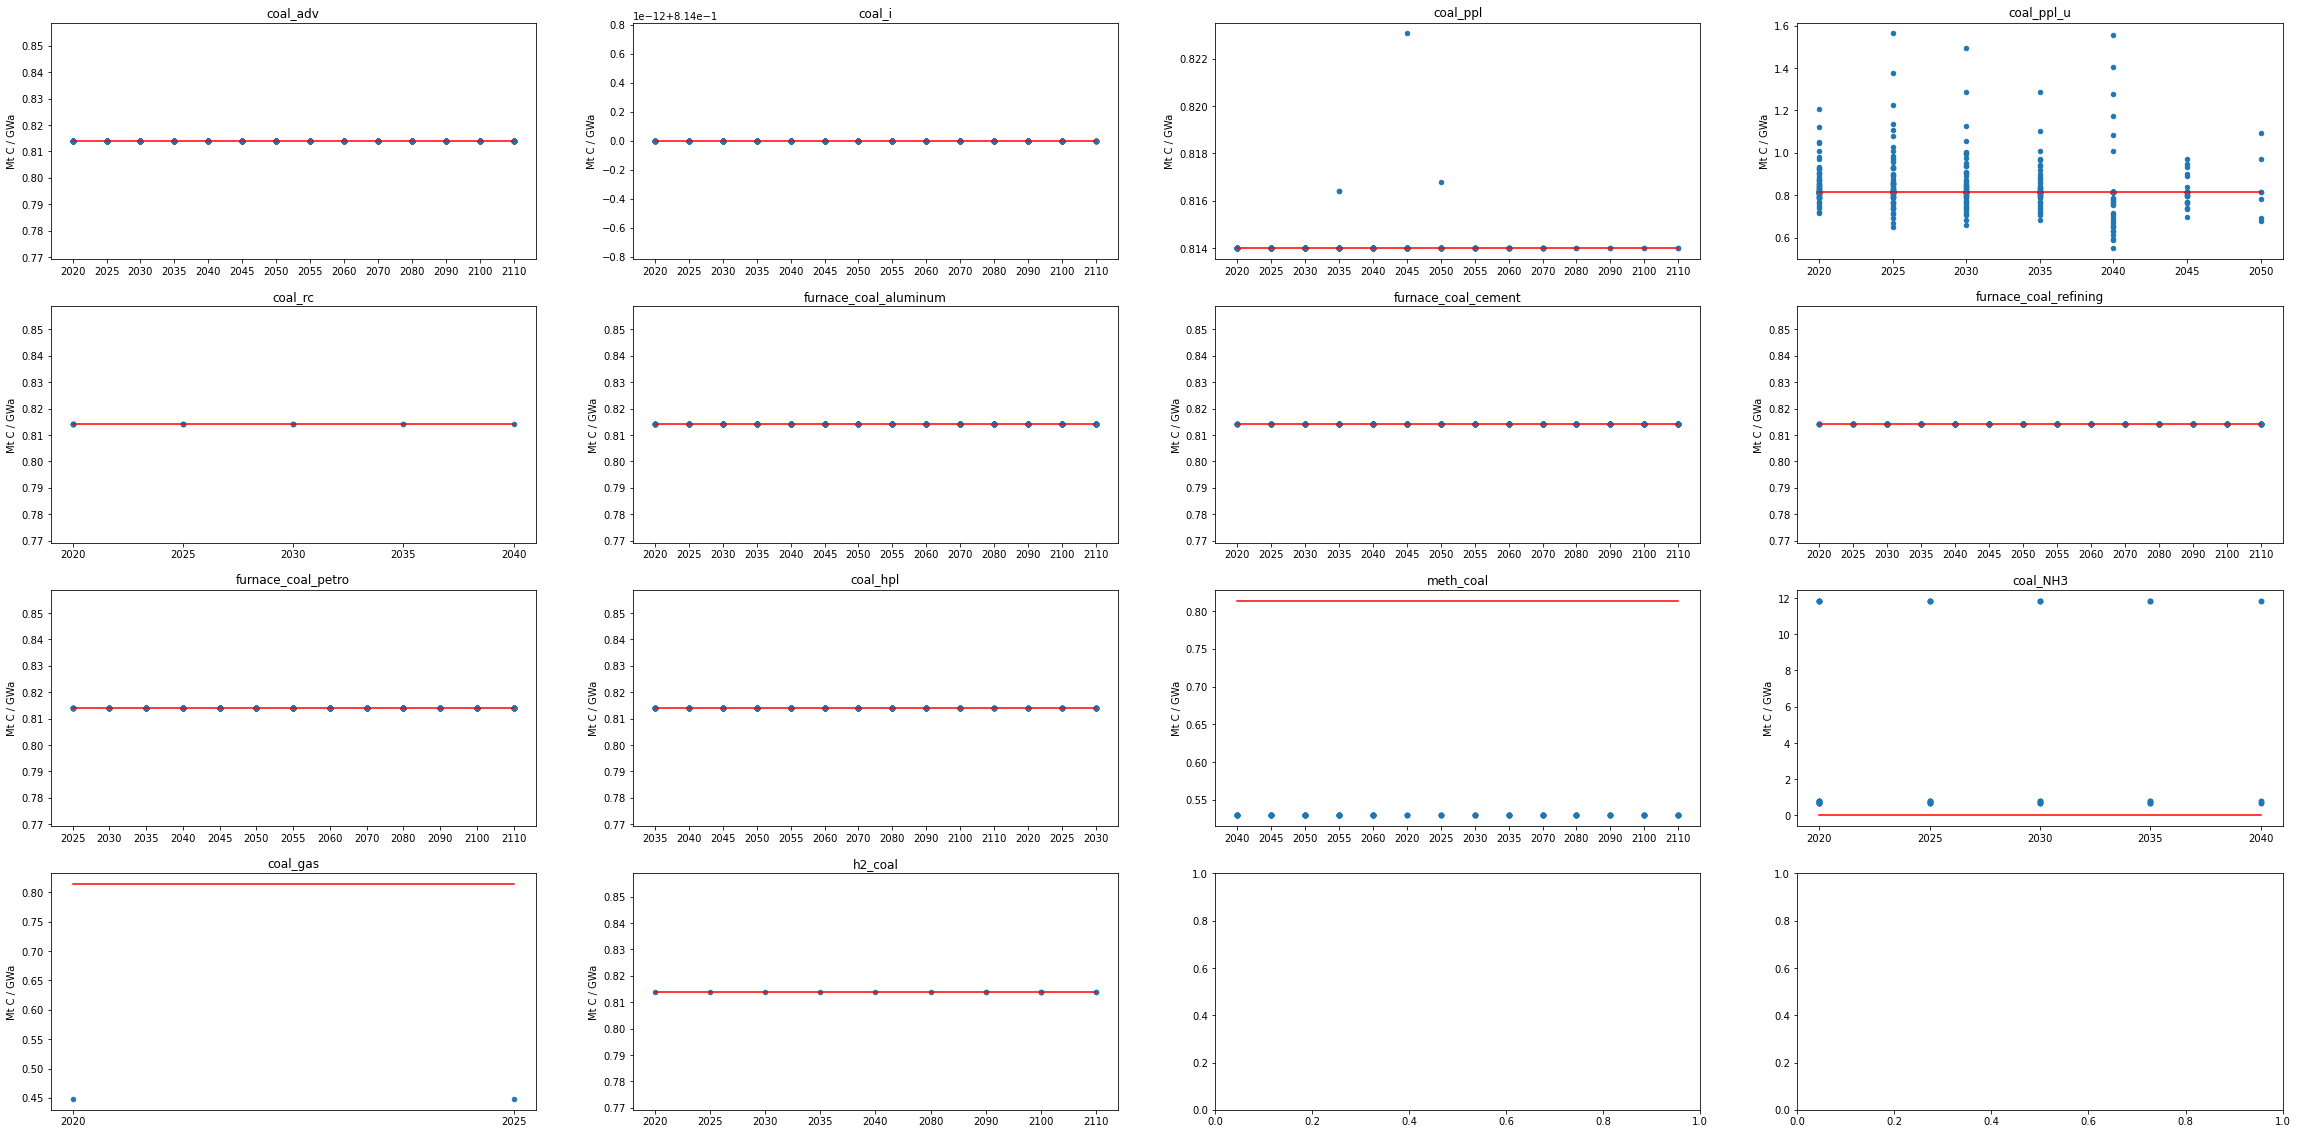

In [96]:
import math
import matplotlib.pyplot as plt
fig, axs = plt.subplots(int(math.sqrt(len(tec_list))), int(math.sqrt(len(tec_list))), figsize=(40,20), facecolor="w")
ax_it = iter(fig.axes)
for k in tec_list:
    print(k)
    try:
        tec = k
        y = ef_false.swaplevel(0,2).loc[tec].droplevel([3,2]).reset_index()
        ax = next((ax_it))
        y.plot.scatter(x="year_act", y=0, ax=ax)
        ax.plot([ef_dict[tec_comm_map[tec]]]*len(y.year_act.unique()), color="red")
        ax.set_ylabel("Mt C / GWa")
        ax.set_title(tec)
        ax.set_xlabel("")
    except:
        pass

In [64]:
fig.savefig("test.png", facecolor="w")

In [ ]:
ef_false.swaplevel(0,2).loc["hp_gas_i"].droplevel([3,2]).reset_index()

## aggregated emissions comparison

In [ ]:
df_gas_t_d["loss"] = (df_gas_t_d["Value"] - 1) * df_gas_t_d["Level"]
t_d_emi = (df_gas_t_d["emi_factor"] * df_gas_t_d["Level"]).groupby(["year_act"]).sum() * co2_c_factor

In [ ]:
df_gas_t_d["emi_factor_corr"] = (df_gas_t_d["Value"] - 1) * df_gas_t_d["ef"]
t_d_emi_corr =(df_gas_t_d["emi_factor_corr"] * df_gas_t_d["Level"]).groupby(["year_act"]).sum() * co2_c_factor

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
t_d_emi.plot(ax=ax)
t_d_emi_corr.plot(ax=ax)
ax.set_ylabel("Mt CO2")
ax.set_title("CO2 Emissions from t_d technologies")
ax.legend(["current CO2_cc", "corrected CO2_cc"])

In [ ]:
df_gas_t_d.swaplevel(0,2).loc["gas_t_d"]

In [ ]:
act_in_yr_reg = act_in.loc[region, year]
comm = "coal"
bott_dict = {
    "coal":top_yr_reg_gas,
    "gas":bott_yr_reg_gas
}
bott_yr_reg_coal_merge = bott_dict[comm].copy(deep=True)
x = act_in_yr_reg[(act_in_yr_reg.index.get_level_values(0).str.contains(comm)) & (act_in_yr_reg["commodity"]==comm) & (act_in_yr_reg["level"]=="final")].join(bott_yr_reg_coal_merge.rename({"Value": "emi_factor"}, axis=1)["emi_factor"])
x = act_in_yr_reg[(act_in_yr_reg["commodity"]==comm)].join(bott_yr_reg_coal_merge.rename({"Value": "emi_factor"}, axis=1)["emi_factor"])
x#.sum()

In [ ]:
x#(x["emi_factor"]/ x["Value"]).dropna()

## oil emissions

In [ ]:
df_bot_oil = get_bot_up_emi_by_fuel(emi_bott_up, region, year)[1]

In [ ]:
df_bot_oil[df_bot_oil.index.get_level_values(0).str.contains("extr")].sum()

In [ ]:
emi_bot_up_refining = df_bot_oil.loc[df_bot_oil.index.get_level_values(0).str.endswith("_ref")]#.sum()
emi_bot_up_extr = df_bot_oil.loc[df_bot_oil.index.get_level_values(0).str.contains("extr")]
emi_bot_up_final = df_bot_oil.loc[(df_bot_oil.index.difference(emi_bot_up_refining.index)) & (df_bot_oil.index.difference(emi_bot_up_extr.index))]

In [ ]:
emi_bot_up_refining.sum()

In [ ]:
emi_bot_up_final.sort_values("emi")

In [ ]:
print("extraction emissions: ",emi_bot_up_extr.sum()["emi"])
print("refining emissions: ",emi_bot_up_refining.sum()["emi"])
print("combustion emissions: ",emi_bot_up_final.sum()["emi"])

In [ ]:
inp_hyd_crack = act_in.loc[region, year, "hydro_cracking_ref"]
inp_hyd_crack[inp_hyd_crack["commodity"] == "hydrogen"].sum()

In [ ]:
inp_steam_crack = act_in.loc[region, year, "steam_cracker_petro"]
inp_steam_crack[~inp_steam_crack["commodity"].isin(["ethane","propane", "electr", "ht_heat"])].sum()["input"] * 0.64

In [ ]:
df_top_oil = get_top_dn_emi_by_fuel(emi_top_down, region, year)[1]

In [ ]:
df_top_oil.loc[df_top_oil.index.get_level_values(0).str.startswith("oil")].sum()

In [ ]:
df_top_oil.loc[~df_top_oil.index.get_level_values(0).str.endswith("ref")]#.sum()#.sort_index()

In [ ]:
carbon_out_foil_loil_exp = df_top_oil[df_top_oil.index.get_level_values(0).str.contains("loil")].sum()["emi"] + df_top_oil[df_top_oil.index.get_level_values(0).str.contains("foil")].sum()["emi"]

In [ ]:
act_out.swaplevel(0,2).loc["MTO_petro"].loc["2025", "R12_CHN"].sum()#.groupby("year_act").sum()